<a href="https://colab.research.google.com/github/yyunshanli/facial-emotion-based-music-recommender/blob/main/emotion_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ameyamote030/einterface-image-dataset

Dataset URL: https://www.kaggle.com/datasets/ameyamote030/einterface-image-dataset
License(s): EU ODP Legal Notice
 99% 790M/801M [00:13<00:00, 118MB/s] 
100% 801M/801M [00:13<00:00, 60.2MB/s]


In [ ]:
# extracting dataset from zip file

from zipfile import ZipFile
dataset = '/content/einterface-image-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()

In [ ]:
import os
import glob as gb
import pandas as pd
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

In [ ]:
train = gb.glob('/content/data/train/*/*.jpg')
test = gb.glob('/content/data/val/*/*.jpg')
BATCH_SIZE = 32

In [ ]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# visualize sample of dataset
def random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  print(F"Image shape: {img.shape}")
  return img

Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)
Image shape: (416, 416, 3)


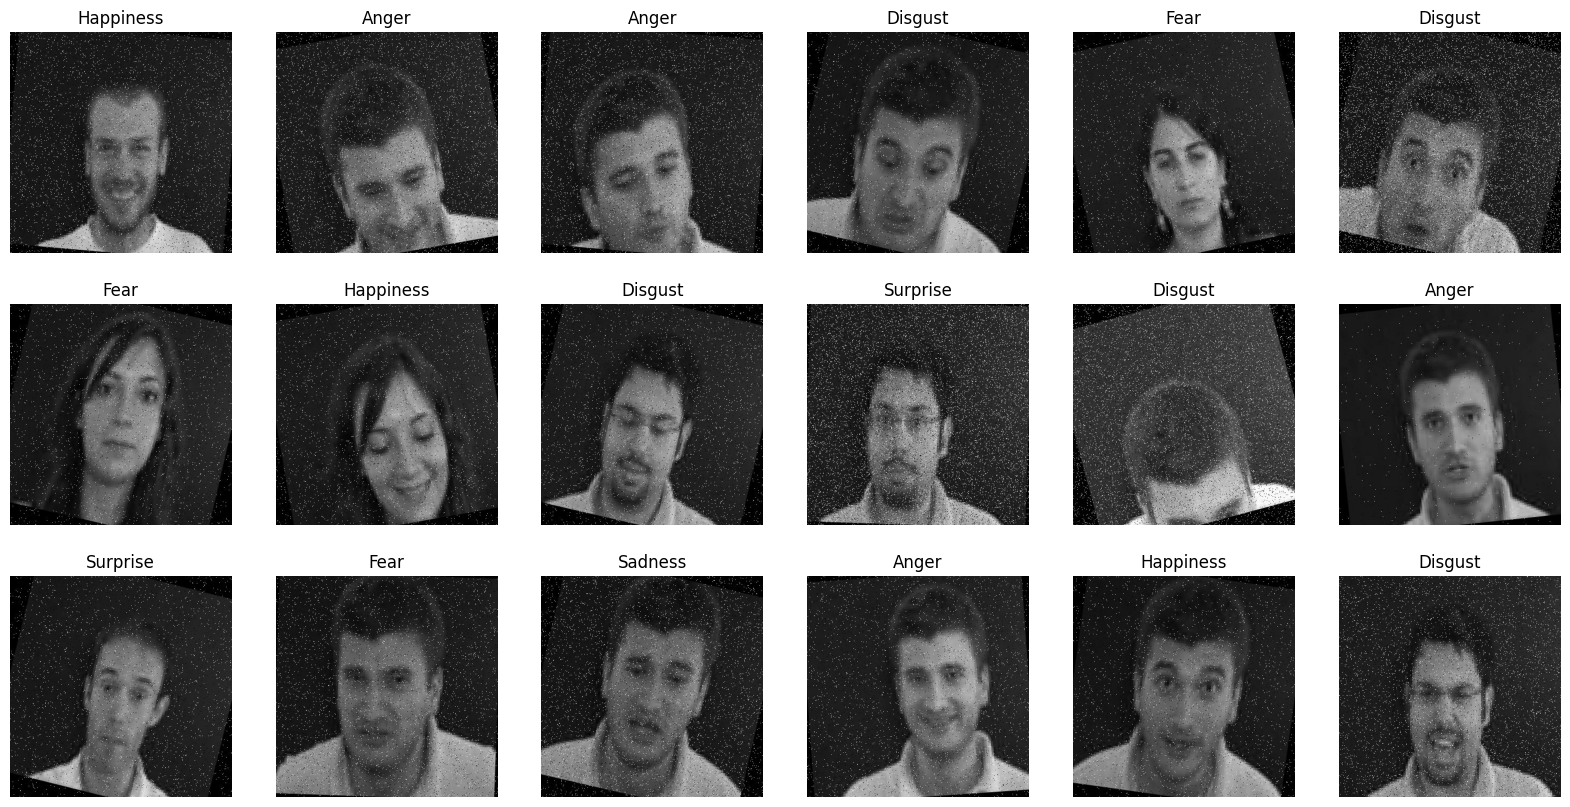

In [ ]:
col_names = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise']
plt.figure(figsize=(20,10))
for i in range(18):
  plt.subplot(3, 6, i+1)
  plt.axis('off')
  target_class = random.choice(col_names)
  img = random_image('/content/data/train/', target_class)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('/content/data/train/',
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/data/val/',
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 11475 images belonging to 6 classes.
Found 1433 images belonging to 6 classes.


In [ ]:
classifier = Sequential()
# input layer
classifier.add(Input(shape=(128, 128, 3)))

# convolutional layer
classifier.add(Conv2D(16, (3, 3), activation = 'relu'))

# max-pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd convolutional and pooling layers
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# flattening layer - 2D feature to 1D vector
classifier.add(Flatten())

# fully connected layer
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'softmax'))

# compilation
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 28800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,686,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,692,390 (14.09 MB)

 Trainable params: 3,692,390 (14.09 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# callback to save model with min val_loss
checkpoint = ModelCheckpoint(
    'model_checkpoint.weights.h5',
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=True,
    mode='min',
    verbose=1
)

# early stopping once val_loss converges
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min',
    verbose=1,
    restore_best_weights=True
)

# training
history = classifier.fit(
    training_set,
    epochs=50,
    validation_data=test_set,
    callbacks=[checkpoint, early_stopping]
)

# save model
classifier.save('model.h5')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 504ms/step - accuracy: 0.2112 - loss: 1.7977
Epoch 1: val_loss improved from inf to 1.50900, saving model to model_checkpoint.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 192s 526ms/step - accuracy: 0.2113 - loss: 1.7975 - val_accuracy: 0.3943 - val_loss: 1.5090
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step - accuracy: 0.4103 - loss: 1.4589
Epoch 2: val_loss improved from 1.50900 to 1.28805, saving model to model_checkpoint.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 187s 516ms/step - accuracy: 0.4103 - loss: 1.4588 - val_accuracy: 0.5066 - val_loss: 1.2881
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 506ms/step - accuracy: 0.5168 - loss: 1.2327
Epoch 3: val_loss improved from 1.28805 to 1.03953, saving model to model_checkpoint.weights.h5
359/359 ━━━━━━━━━━━━━━━━━━━━ 206s 527ms/step - accuracy: 0.5168 - loss: 1.2326 - val_accuracy: 0.6001 - val_loss: 1.0395
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.5836 - loss: 1.0428
Epoch 4: val

In [ ]:
classifier.save('my_model.keras')

In [ ]:
classifier.evaluate(test_set)

45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 176ms/step - accuracy: 0.8859 - loss: 0.3165


[0.3103041350841522, 0.8869504332542419]

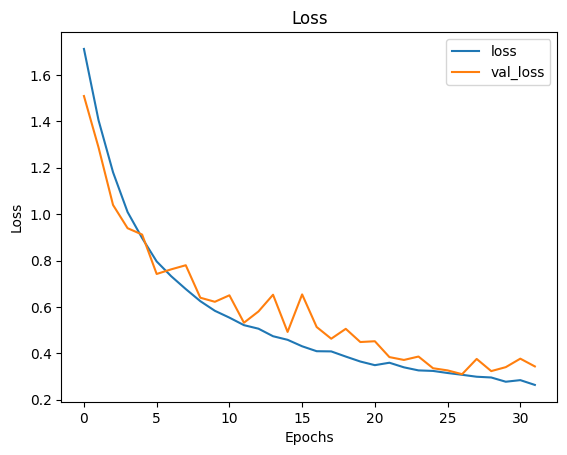

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

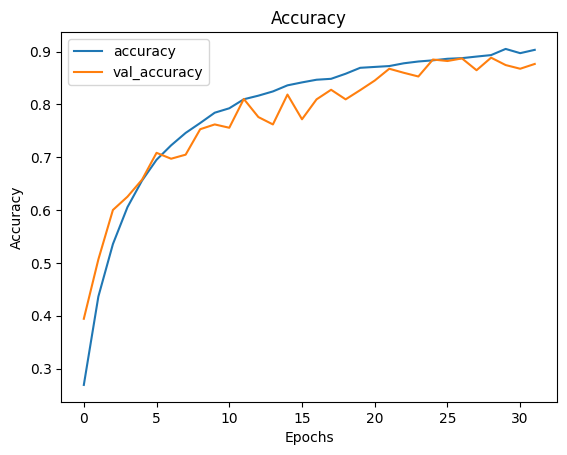

In [ ]:
pd.DataFrame(history.history)[['accuracy', 'val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
training_set.class_indices

{'Anger': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happiness': 3,
 'Sadness': 4,
 'Surprise': 5}